In [42]:
!pip install catboost
!pip install pandas numpy matplotlib scikit-learn

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
df = pd.read_csv('movie_final_dataset1.csv')

df.head()
#print(df.shape)


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,Western,Metro-Goldwyn-Mayer,Paramount,Warner Bros. Pictures,20th Century Fox,Universal Pictures,Columbia Pictures,Walt Disney Productions,ROI,first_genre
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482,...,0,0,0,1,0,0,0,0,172.912002,Action
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816,...,0,0,0,0,0,0,0,0,264.865644,Horror
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1326387384,...,0,0,0,0,0,0,0,0,563.193692,Action
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464,...,0,0,1,0,0,0,0,0,103.522732,Action
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734,...,0,0,0,0,0,0,0,0,259.901965,Science Fiction


In [45]:
print(df.columns)

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'year', 'month', 'day', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'Metro-Goldwyn-Mayer',
       'Paramount', 'Warner Bros. Pictures', '20th Century Fox',
       'Universal Pictures', 'Columbia Pictures', 'Walt Disney Productions',
       'ROI', 'first_genre'],
      dtype='object')


In [46]:
df['budget_million'] = df['budget'] * 1000


In [47]:
genre = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

production_company = [ 'Metro-Goldwyn-Mayer', 'Paramount', 'Warner Bros. Pictures', '20th Century Fox', 'Universal Pictures', 'Columbia Pictures', 'Walt Disney Productions']



X = df[genre + production_company + ['budget', 'year', 'month', 'runtime']]
y = df['revenue']

In [48]:
X = df[['genres','production_companies','budget', 'year', 'month', 'runtime']]
y = df['revenue']

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_features = ['budget', 'runtime']
normalized_data = scaler.fit_transform(df[numerical_features])
normalized_df = pd.DataFrame(normalized_data, columns=numerical_features)


In [53]:
X = pd.concat([
    df[['genres', 'production_companies']],
    df[['year']],
    normalized_df
], axis=1)

y = df['revenue']


In [54]:
cat_features = [0, 1]


In [66]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=100
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    plot=True
)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R²: {r2}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 146964998.5064998	test: 180079862.2359127	best: 180079862.2359127 (0)	total: 21.9ms	remaining: 21.9s
100:	learn: 87171466.2675885	test: 122294583.3487842	best: 121788787.6712428 (61)	total: 1.21s	remaining: 10.7s
200:	learn: 79672821.0038646	test: 124163001.6777270	best: 121788787.6712428 (61)	total: 1.77s	remaining: 7.03s
300:	learn: 75292621.2891836	test: 124657895.5083475	best: 121788787.6712428 (61)	total: 2.36s	remaining: 5.47s
400:	learn: 71729318.3809736	test: 125193346.2910876	best: 121788787.6712428 (61)	total: 3.23s	remaining: 4.83s
500:	learn: 68706332.5570094	test: 125345957.6851379	best: 121788787.6712428 (61)	total: 4.7s	remaining: 4.68s
600:	learn: 65812368.1958612	test: 125880885.1912921	best: 121788787.6712428 (61)	total: 6.26s	remaining: 4.16s
700:	learn: 63724752.3074746	test: 126013346.5980063	best: 121788787.6712428 (61)	total: 6.88s	remaining: 2.94s
800:	learn: 61732621.8637507	test: 126488235.7114290	best: 121788787.6712428 (61)	total: 7.59s	remaining: 

<ipython-input-69-9e727e513e15>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


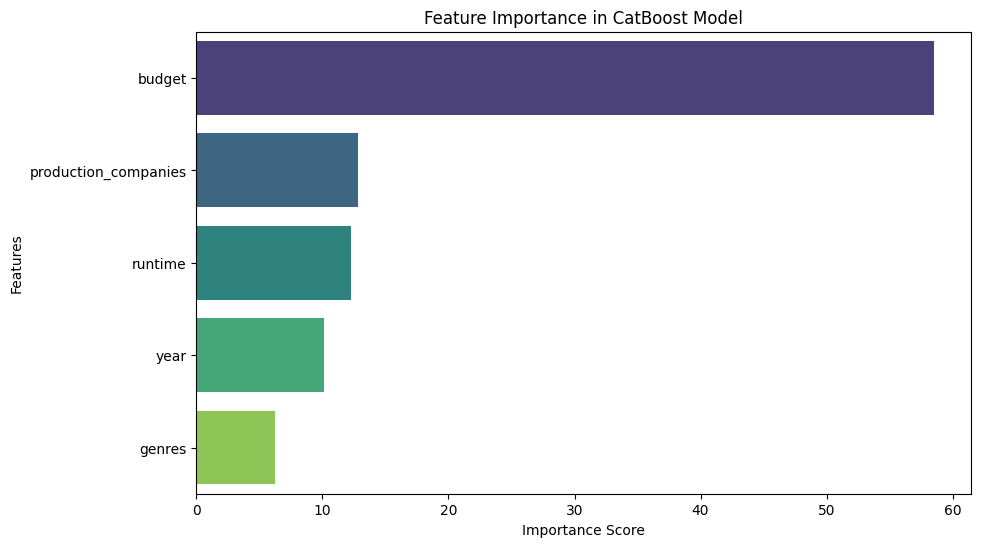

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.get_feature_importance()
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in CatBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Filtered Revenue Range: 2968 - 1023784195


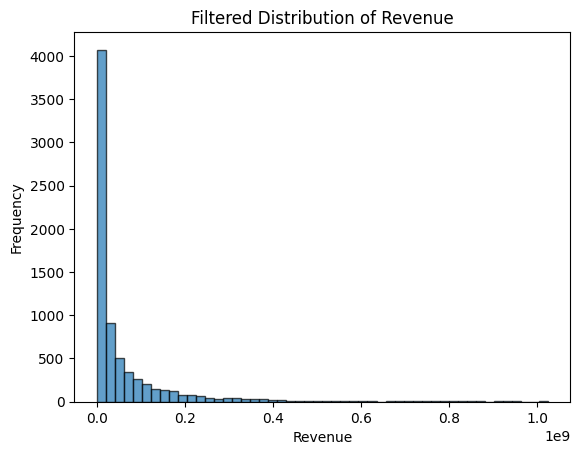

In [ ]:
print(f"Filtered Revenue Range: {y_train_filtered.min()} - {y_train_filtered.max()}")

import matplotlib.pyplot as plt
plt.hist(y_train_filtered, bins=50, edgecolor='k', alpha=0.7)
plt.title("Filtered Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()
